In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from core.TSP import tsp_solver_1

## Sanity check on Berlin TSP
The berlin52 problem is symmetric, has 52 data points and an optimal tour length of 7544. 

In [3]:
from data.berlin_problem import read_berlin_file, points_to_matrix
points = read_berlin_file()
cost_matrix = points_to_matrix(read_berlin_file())
print(cost_matrix.shape)

(52, 52)


In [4]:
cycle, obj_value, time_elapsed = tsp_solver_1(cost_matrix, solver='glpk')
print(cycle)
print("Objective value = {}".format(obj_value))
print("Time elapsed = {}".format(time_elapsed))
assert abs(obj_value - 7544) < 1

[0, 21, 30, 17, 2, 16, 20, 41, 6, 1, 29, 22, 19, 49, 28, 15, 45, 43, 33, 34, 35, 38, 39, 36, 37, 47, 23, 4, 14, 5, 3, 24, 11, 27, 26, 25, 46, 12, 13, 51, 10, 50, 32, 42, 9, 8, 7, 40, 18, 44, 31, 48]
Objective value = 7544.365901904088
Time elapsed = 38.56651735305786


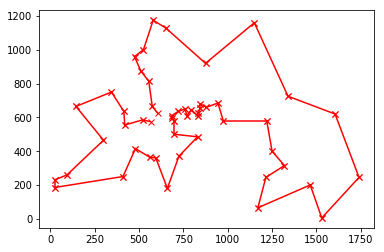

In [5]:
# Plotting the optimal found route
for i in range(len(cycle)-1):
    start = cycle[i]
    end = cycle[i+1]
    x = [points[start][0], points[end][0]]
    y = [points[start][1], points[end][1]]
    plt.plot(x, y, 'rx-')

## GLPK vs CPLEX
In the following example, we see that the GLPK solver suffers from numerical instability when some entries in the cost matrix are extremely large. 

In [6]:
# Note the large entry 1.e+15
cost_matrix = np.array([[0.e+00, 2.e+00, 3.e+00, 5.e+00, 2.e+02, 1.e+15],
                        [1.e+00, 0.e+00, 4.e+00, 4.e+00, 2.e+00, 1.e+15],
                        [4.e+00, 3.e+00, 0.e+00, 3.e+00, 1.e+00, 1.e+15],
                        [1.e+00, 2.e+00, 3.e+00, 0.e+00, 4.e+00, 1.e+15],
                        [1.e+15, 1.e+15, 1.e+15, 1.e+15, 1.e+15, 0.e+00],
                        [0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e+15, 1.e+15]])

In [7]:
# Using GLPK
cycle, obj_value, time_elapsed = tsp_solver_1(cost_matrix, solver='glpk')
print(cycle)
print("Objective value = {}".format(obj_value))
print("Time elapsed = {}".format(time_elapsed))

[0, 4, 5, 3, 1, 2]
Objective value = 210.0
Time elapsed = 0.7709932327270508


In [8]:
# Using CPLEX
cycle, obj_value, time_elapsed = tsp_solver_1(cost_matrix, solver='cplex')
print(cycle)
print("Objective value = {}".format(obj_value))
print("Time elapsed = {}".format(time_elapsed))

[0, 2, 4, 5, 3, 1]
Objective value = 7.0
Time elapsed = 0.9319953918457031


In [9]:
# Note that if we reduce the entries to 1.e+10, GLPK and CPLEX give the same answer. 
cost_matrix = np.array([[0.e+00, 2.e+00, 3.e+00, 5.e+00, 2.e+02, 1.e+10],
                        [1.e+00, 0.e+00, 4.e+00, 4.e+00, 2.e+00, 1.e+10],
                        [4.e+00, 3.e+00, 0.e+00, 3.e+00, 1.e+00, 1.e+10],
                        [1.e+00, 2.e+00, 3.e+00, 0.e+00, 4.e+00, 1.e+10],
                        [1.e+10, 1.e+10, 1.e+10, 1.e+10, 1.e+10, 0.e+00],
                        [0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e+10, 1.e+10]])

In [10]:
# Using GLPK
cycle, obj_value, time_elapsed = tsp_solver_1(cost_matrix, solver='glpk')
print(cycle)
print("Objective value = {}".format(obj_value))
print("Time elapsed = {}".format(time_elapsed))

[0, 2, 4, 5, 3, 1]
Objective value = 7.0
Time elapsed = 0.8219921588897705


In [11]:
# Using CPLEX
cycle, obj_value, time_elapsed = tsp_solver_1(cost_matrix, solver='cplex')
print(cycle)
print("Objective value = {}".format(obj_value))
print("Time elapsed = {}".format(time_elapsed))

[0, 2, 4, 5, 3, 1]
Objective value = 7.0
Time elapsed = 1.3979957103729248


## Test on asymmetric TSP
In the following, we check that the TSP solver correctly solves asymmetric problems. Benchmark problems are from:
https://www.iwr.uni-heidelberg.de/groups/comopt/software/TSPLIB95/

The ftv35 problem is asymmetric, has 34 data points and an optimal tour length of 1286. 

In [12]:
from data.atsp_problem import read_atsp_file
cost_matrix = read_atsp_file('data/atsp/ftv33.atsp')
print(cost_matrix.shape)

['NAME:', 'ftv33\n']
['TYPE:', 'ATSP\n']
['COMMENT:', 'Asymmetric', 'TSP', '(Fischetti)\n']
['DIMENSION:', '34\n']
['EDGE_WEIGHT_TYPE:', 'EXPLICIT\n']
['EDGE_WEIGHT_FORMAT:', 'FULL_MATRIX', '\n']
['EDGE_WEIGHT_SECTION\n']
(34, 34)


In [13]:
cycle, obj_value, time_elapsed = tsp_solver_1(cost_matrix, solver='glpk')
print(cycle)
print("Objective value = {}".format(obj_value))
print("Time elapsed = {}".format(time_elapsed))
assert obj_value == 1286

[0, 13, 12, 14, 15, 16, 1, 25, 24, 23, 26, 27, 28, 29, 22, 20, 21, 31, 18, 19, 17, 11, 8, 10, 9, 32, 7, 4, 6, 5, 30, 33, 2, 3]
Objective value = 1286.0
Time elapsed = 16.8548583984375


## Pathological case for TSP
In the following, we present a pathological case in which the TSP solver fails to return a solution in a reasonable amount of time. In particular, the solver begins to enumerate through an exponential number of subtours, adding them as lazy constraints. Both GLPK and CPLEX suffer from this. 

The br17 problem is asymmetric, has 17 data points and an optimal tour length of 39. 

In [14]:
cost_matrix = read_atsp_file('data/atsp/br17.atsp')
print(cost_matrix.shape)

['NAME:', '', 'br17\n']
['TYPE:', 'ATSP\n']
['COMMENT:', '17', 'city', 'problem', '(Repetto)\n']
['DIMENSION:', '', '17\n']
['EDGE_WEIGHT_TYPE:', 'EXPLICIT\n']
['EDGE_WEIGHT_FORMAT:', 'FULL_MATRIX', '\n']
['EDGE_WEIGHT_SECTION\n']
(17, 17)


In [15]:
cycle, obj_value, time_elapsed = tsp_solver_1(cost_matrix, solver='glpk',timeout=10*60)
print(cycle)
print("Objective value = {}".format(obj_value))
print("Time elapsed = {}".format(time_elapsed))

Number of lazy constraints added = 130
Timeout reached after 600 seconds...
None
Objective value = None
Time elapsed = None


In [16]:
cycle, obj_value, time_elapsed = tsp_solver_1(cost_matrix, solver='cplex',timeout=10*60)
print(cycle)
print("Objective value = {}".format(obj_value))
print("Time elapsed = {}".format(time_elapsed))

Number of lazy constraints added = 409
Timeout reached after 600 seconds...
None
Objective value = None
Time elapsed = None
